<a href="https://colab.research.google.com/github/IagoMagalhaes23/BBP1026---PROCESSAMENTO-DIGITAL-DE-IMAGENS/blob/main/Efeito_da_quantiza%C3%A7%C3%A3o_e_amostragem_Iago_Magalhaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise do efeito de quantização e amostragem
- Autor: Iago Magalhães
- Matrícula: 559973
- Disciplina: Processamento Digital de Imagens

##Importação das bibliotecas

In [48]:
import cv2
import pylab
import numpy as np
import skimage.data as data
import matplotlib.pyplot as plt

##Baixando imagem astronaut

In [7]:
!wget https://live.staticflickr.com/8674/16504233985_9f1060624e_s.jpg

--2023-09-23 02:34:43--  https://live.staticflickr.com/8674/16504233985_9f1060624e_s.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 18.238.247.73, 2600:9000:223f:7a00:0:5a51:64c9:c681, 2600:9000:223f:4000:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|18.238.247.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘16504233985_9f1060624e_s.jpg’

16504233985_9f10606     [ <=>                ]   8.07K  --.-KB/s    in 0s      

2023-09-23 02:34:43 (184 MB/s) - ‘16504233985_9f1060624e_s.jpg’ saved [8266]



##Função para conversão da imagem para tons de cinza

In [25]:
def rgb_to_gray(img):
  '''
    Função para converter imagens RGB para Gray
    :param img: image array
    :return: image gray
  '''
  grayImage = np.zeros(img.shape)
  R = np.array(img[:, :, 0])
  G = np.array(img[:, :, 1])
  B = np.array(img[:, :, 2])

  R = (R *.299)
  G = (G *.587)
  B = (B *.114)

  Avg = (R+G+B)
  grayImage = img.copy()

  for i in range(3):
    grayImage[:,:,i] = Avg

  return grayImage

Shape da imagem convertida: (512, 512, 3)


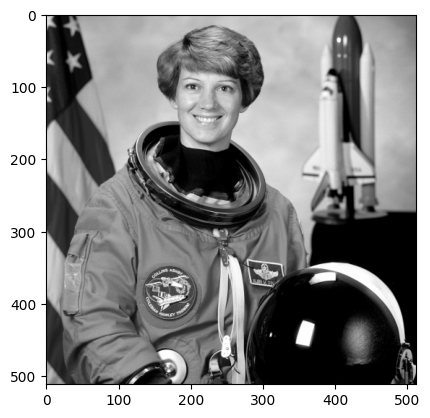

In [31]:
#Carregando imagem 'astronaut' da biblioteca SKImage
image = data.astronaut()

#Convertando a imagem RGB em Gray
grayImage = rgb_to_gray(image)

#Printando o shape da imagem convertida em tons de cinza
print("Shape da imagem convertida: {}".format(grayImage.shape))

#Plotando a imagem em tons de cinza
plt.imshow(grayImage)
plt.show()

##Função de quantização de imagens

In [59]:
def quantizacao(img, bits):
  '''
    Função para realizar a quantização de imagens
    :param img: image array
    :param bits: número de bits para quantização
    :return: imagem quantizada
  '''
  image = np.float32(img)
  bucket = int(256 / bits)
  print(bucket)
  quantizado = (image / (256 / bits))
  return np.uint8(quantizado) * bucket

##Analisando processamento

###Quantização para 4 bits

64


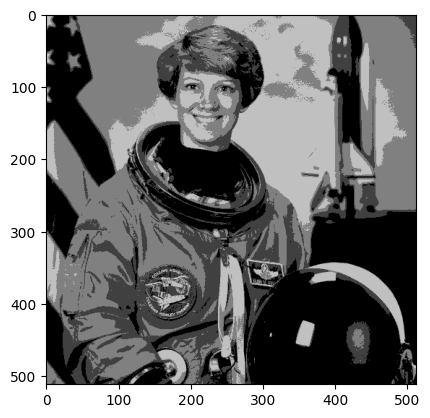

In [60]:
#Quantizando imagem
imagem4b = quantizacao(grayImage, 4)
plt.imshow(imagem4b)
plt.show()

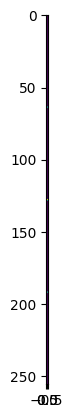

In [67]:
#Calculando histograma
hist = cv2.calcHist([imagem4b],[0],None,[256],[0,256])
plt.imshow(hist)
plt.show()

###Quantização para 8 bits

32


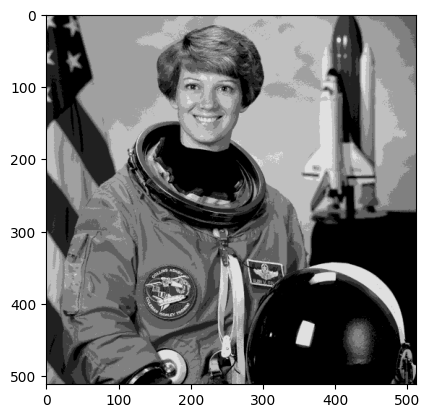

In [61]:
#Quantizando imagem
imagem8b = quantizacao(grayImage, 8)
plt.imshow(imagem8b)
plt.show()

###Quantização para 16 bits

16


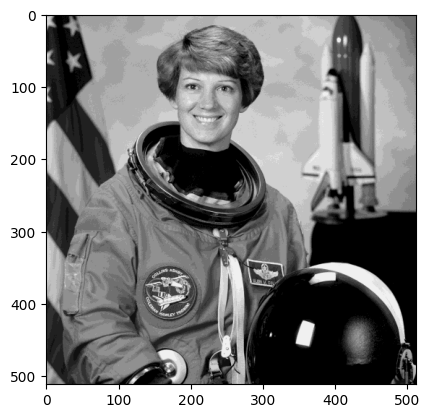

In [62]:
#Quantizando imagem
imagem16b = quantizacao(grayImage, 16)
plt.imshow(imagem16b)
plt.show()

###Quantização para 32 bits

8


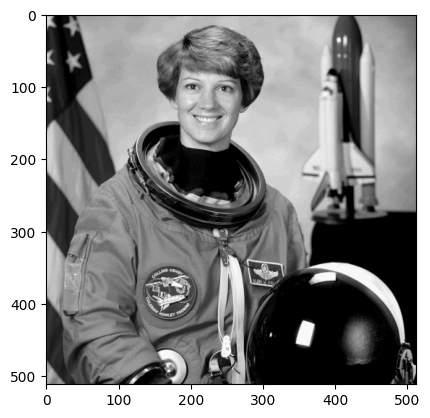

In [63]:
#Quantizando imagem
imagem32b = quantizacao(grayImage, 32)
plt.imshow(imagem32b)
plt.show()

##Referências
- https://www.flickr.com/photos/nasacommons/16504233985/in/photostream/
- https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.astronaut
- https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
- https://pt.wikipedia.org/wiki/Quantiza%C3%A7%C3%A3o_de_cores
- https://www.pucsp.br/~jarakaki/pai/Roteiro4.pdf
- https://guilhermekfreitaslab.wordpress.com/2015/09/16/amostragem-e-quantizacao/
- http://www.rafaelzottesso.com.br/2015/09/amostragem-e-quantizacao/